In [0]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


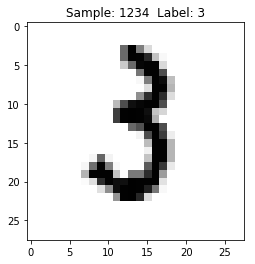

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 170s - loss: 0.1853 - acc: 0.9433 - val_loss: 0.0429 - val_acc: 0.9860
Epoch 2/10
60000/60000 - 169s - loss: 0.0789 - acc: 0.9767 - val_loss: 0.0380 - val_acc: 0.9870
Epoch 3/10
60000/60000 - 168s - loss: 0.0619 - acc: 0.9818 - val_loss: 0.0299 - val_acc: 0.9910
Epoch 4/10
60000/60000 - 169s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0285 - val_acc: 0.9905
Epoch 5/10
60000/60000 - 170s - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0317 - val_acc: 0.9902
Epoch 6/10
60000/60000 - 170s - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0285 - val_acc: 0.9911
Epoch 7/10
60000/60000 - 169s - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0283 - val_acc: 0.9918
Epoch 8/10
60000/60000 - 169s - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0408 - val_acc: 0.9891
Epoch 9/10
60000/60000 - 169s - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0283 - val_acc: 0.9922
Epoch 10/10
60000/60000 - 169s - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0308 - val_a

In [9]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03075392040698689
Test accuracy: 0.9915
